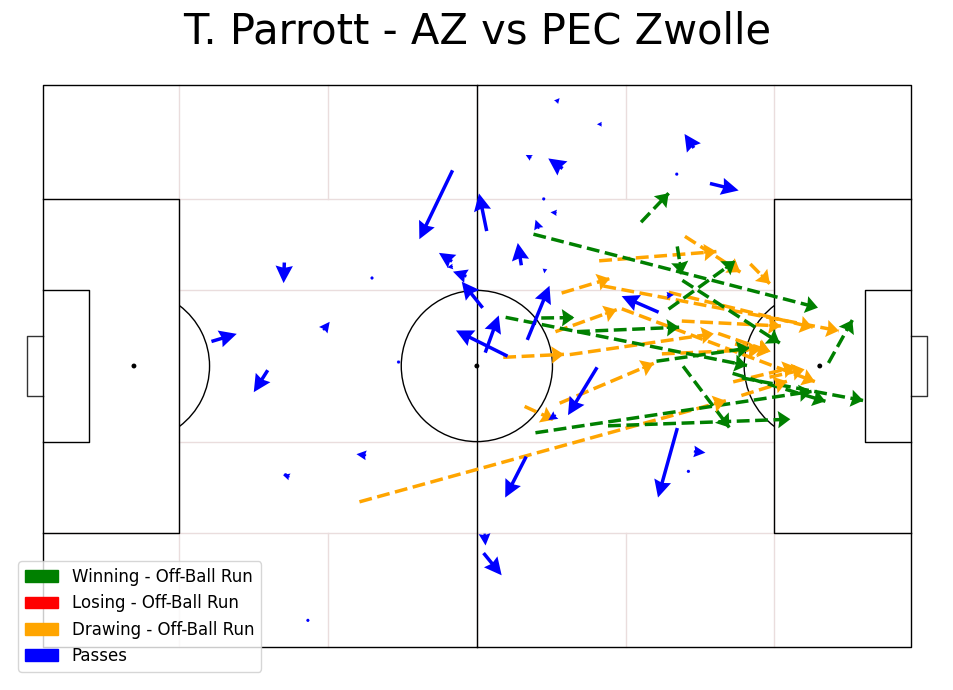

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mplsoccer.pitch import Pitch, VerticalPitch
import matplotlib.patches as mpatches

# Load CSV
df = pd.read_csv("/Users/marclambertes/Downloads/Wyscout/2002510_dynamic_events.csv")

# Filter for events
df_runs = df[(df["event_type"] == "off_ball_run") & (df["player_name"] == "T. Parrott")]

# Filter passing options only if "received" == True
df_pass_options = df[(df["event_type"] == "passing_option") & 
                     (df["player_name"] == "J. Clasie") & 
                     (df["received"] == True)]  # Ensure received pass

# Set up the pitch (SkillCorner requires pitch_length and pitch_width)
pitch = Pitch(positional=True, pitch_type='skillcorner', pitch_color='white', line_color='black',
                      linewidth=1, half=False, goal_type='box', goal_alpha=0.8, 
                      pitch_length=105, pitch_width=68)  # Set pitch dimensions

# Create figure
fig, ax = pitch.draw(figsize=(10, 7))

### 🔹 Plot Off-Ball Runs (Dashed lines + arrowheads)
legend_patches = []  # Store legend items

for _, row in df_runs.iterrows():
    if 'game_state' in df_runs.columns:
        if row['game_state'] == "winning":
            color = 'green'
        elif row['game_state'] == "losing":
            color = 'red'
        elif row['game_state'] == "drawing":
            color = 'orange'
        else:
            color = 'gray'  # Default if state is missing/unexpected
    else:
        color = 'gray'  # Default if "game_state" column is missing
    
    # Draw dashed line
    pitch.lines(row["x_start"], row["y_start"], row["x_end"], row["y_end"], 
                linestyle="--", linewidth=2.5, color=color, ax=ax, zorder=2)
    
    # Draw arrowhead (small arrow near the end point)
    arrow_length = 1.5  # Adjust size of arrowhead
    pitch.arrows(row["x_end"] - (arrow_length * (row["x_end"] - row["x_start"]) / np.hypot(row["x_end"] - row["x_start"], row["y_end"] - row["y_start"])),
                 row["y_end"] - (arrow_length * (row["y_end"] - row["y_start"]) / np.hypot(row["x_end"] - row["x_start"], row["y_end"] - row["y_start"])),
                 row["x_end"], row["y_end"], 
                 width=2.5, headwidth=7, headlength=5, color=color, ax=ax, zorder=3)

# Add legend for off-ball runs (only once)
legend_patches.append(mpatches.Patch(color='green', label='Winning - Off-Ball Run'))
legend_patches.append(mpatches.Patch(color='red', label='Losing - Off-Ball Run'))
legend_patches.append(mpatches.Patch(color='orange', label='Drawing - Off-Ball Run'))

### 🔹 Plot Passing Options (Solid blue lines with arrowheads, only if received)
for _, row in df_pass_options.iterrows():
    pitch.arrows(row["x_start"], row["y_start"], row["x_end"], row["y_end"], 
                 width=2.5, headwidth=5, headlength=5, color='blue', ax=ax, zorder=3)

# Add legend for passing options
legend_patches.append(mpatches.Patch(color='blue', label='Passes'))

# Dynamic player name in title
player_name = df_runs["player_name"].iloc[0]  # Get player name dynamically from the DataFrame

# Title with player name
plt.title(f"{player_name} - AZ vs PEC Zwolle", fontsize=30)

# Add legend
ax.legend(handles=legend_patches, loc='lower left', fontsize=12)

# Save the plot as a PNG file
plt.savefig("/Users/marclambertes/Downloads/T_Parrott_offball_runs_and_passes.png", dpi=300)

# Show the plot
plt.show()
